# Sujet : Anticipez l'affluence au sein des gares SNCF-Transilien !

*De la purification Loanne, Fumey Tristan, Marechal Aloïs*

## Importation des données

In [2]:
import pandas as pd

Train_x = pd.read_csv('train_f_x.csv')
Train_y = pd.read_csv('y_train_sncf.csv')

On va convertir les données

In [3]:
#Pour X

Train_x['date'] = pd.to_datetime(Train_x['date'])

Train_x['Année'] = Train_x['date'].dt.year
Train_x['Mois'] = Train_x['date'].dt.month
Train_x['Jour'] = Train_x['date'].dt.day

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

Train_x['station_Encoded'] = encoder.fit_transform(Train_x['station'])

Train_x = Train_x.drop(columns='station')

print(Train_x)

              date  job  ferie  vacances  Année  Mois  Jour  station_Encoded
0       2015-01-01    1      1         1   2015     1     1               24
1       2015-01-01    1      1         1   2015     1     1              295
2       2015-01-01    1      1         1   2015     1     1              107
3       2015-01-01    1      1         1   2015     1     1              367
4       2015-01-01    1      1         1   2015     1     1              199
...            ...  ...    ...       ...    ...   ...   ...              ...
1229858 2022-12-31    0      0         1   2022    12    31              368
1229859 2022-12-31    0      0         1   2022    12    31              285
1229860 2022-12-31    0      0         1   2022    12    31              310
1229861 2022-12-31    0      0         1   2022    12    31              143
1229862 2022-12-31    0      0         1   2022    12    31              391

[1229863 rows x 8 columns]


In [4]:
#Pour Y 
import numpy as np

Train_y = Train_y.drop(columns='index')

print(Train_y)

            y
0           7
1           0
2           9
3           9
4          28
...       ...
1229858  1227
1229859   544
1229860    92
1229861    91
1229862    18

[1229863 rows x 1 columns]


## Visualisation des données

### Etape 1 : On cherche à enlever des features redondante

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt 

Visu = pd.concat([Train_x, Train_y], axis=1)

print(Visu)


              date  job  ferie  vacances  Année  Mois  Jour  station_Encoded  \
0       2015-01-01    1      1         1   2015     1     1               24   
1       2015-01-01    1      1         1   2015     1     1              295   
2       2015-01-01    1      1         1   2015     1     1              107   
3       2015-01-01    1      1         1   2015     1     1              367   
4       2015-01-01    1      1         1   2015     1     1              199   
...            ...  ...    ...       ...    ...   ...   ...              ...   
1229858 2022-12-31    0      0         1   2022    12    31              368   
1229859 2022-12-31    0      0         1   2022    12    31              285   
1229860 2022-12-31    0      0         1   2022    12    31              310   
1229861 2022-12-31    0      0         1   2022    12    31              143   
1229862 2022-12-31    0      0         1   2022    12    31              391   

            y  
0           7  
1      

In [6]:
somme_job_t = Visu.loc[Visu['job'] == 0, 'y'].mean()
somme_job_f = Visu.loc[Visu['job'] == 1, 'y'].mean()

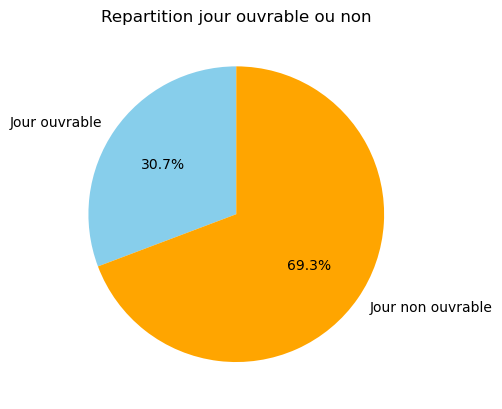

In [7]:
plt.pie([somme_job_t,somme_job_f], labels=['Jour ouvrable','Jour non ouvrable'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Repartition jour ouvrable ou non')
plt.show()

On observe que malgré le peu de jour non ouvrable, il représente la majorité des validations de transport

In [8]:
somme_ferie_t = Visu.loc[Visu['ferie'] == 0, 'y'].mean()
somme_ferie_f = Visu.loc[Visu['ferie'] == 1, 'y'].mean()

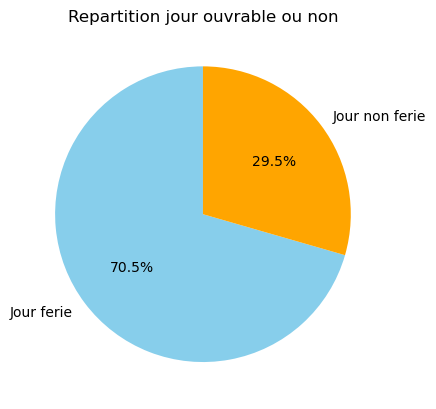

In [9]:
plt.pie([somme_ferie_t,somme_ferie_f], labels=['Jour ferie','Jour non ferie'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Repartition jour ouvrable ou non')
plt.show()

Les jours ferie sont des jours de très forte affluence

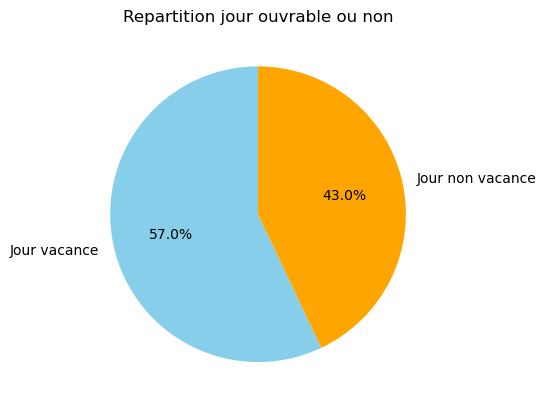

In [10]:
somme_vac_t = Visu.loc[Visu['vacances'] == 0, 'y'].mean()
somme_vac_f = Visu.loc[Visu['vacances'] == 1, 'y'].mean()

plt.pie([somme_vac_t,somme_vac_f], labels=['Jour vacance','Jour non vacance'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Repartition jour ouvrable ou non')
plt.show()

In [11]:
somme_annee_2015 = Visu.loc[Visu['Année'] == 2015, 'y'].sum()
somme_annee_2016 = Visu.loc[Visu['Année'] == 2016, 'y'].sum()
somme_annee_2017 = Visu.loc[Visu['Année'] == 2017, 'y'].sum()
somme_annee_2018 = Visu.loc[Visu['Année'] == 2018, 'y'].sum()
somme_annee_2019 = Visu.loc[Visu['Année'] == 2019, 'y'].sum()
somme_annee_2020 = Visu.loc[Visu['Année'] == 2020, 'y'].sum()
somme_annee_2021 = Visu.loc[Visu['Année'] == 2021, 'y'].sum()
somme_annee_2022 = Visu.loc[Visu['Année'] == 2022, 'y'].sum()



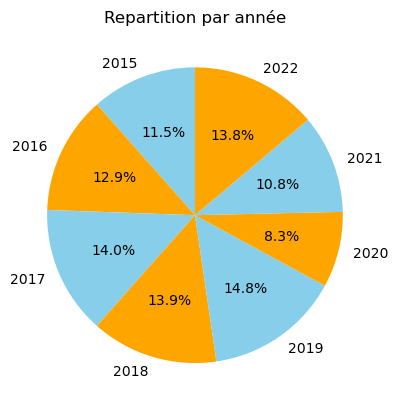

In [12]:
plt.pie([somme_annee_2015,somme_annee_2016,somme_annee_2017,somme_annee_2018,somme_annee_2019,somme_annee_2020,somme_annee_2021,somme_annee_2022], labels=['2015','2016','2017','2018','2019','2020','2021','2022'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Repartition par année')
plt.show()

On observe que 2020 et 2021 les années covid faussent le jeu de données on va donc les enlever pour obtenir un meilleur resultat sur 2023. 

On pourrait ensuite supprimer la colonne année car les résulats changent peu d'année en année pour gagner en vitesse d'apprentissage

In [13]:
df = Train_x[~Train_x['Année'].isin([2020, 2021])]

Visu = pd.concat([Train_x, Train_y], axis=1)

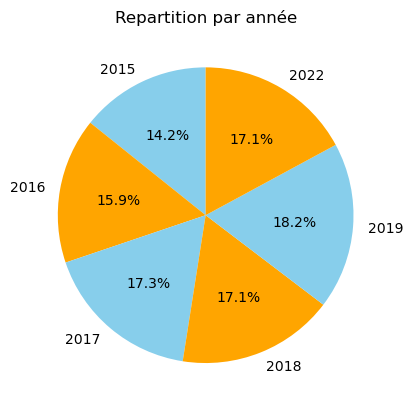

In [14]:
plt.pie([somme_annee_2015,somme_annee_2016,somme_annee_2017,somme_annee_2018,somme_annee_2019,somme_annee_2022], labels=['2015','2016','2017','2018','2019','2022'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Repartition par année')
plt.show()

On observe une croissance de 2015 à 2019 et une reprise en l'année 2022 au niveau de 2017

In [15]:
# Exemple : Calculer la moyenne de 'y' pour chaque mois
somme_mois = Visu.groupby('Mois')['y'].sum()

# Résultat pour chaque mois
somme_janvier = somme_mois.get(1, 0)  
somme_fevrier = somme_mois.get(2, 0)  
somme_mars = somme_mois.get(3, 0)     
somme_avril = somme_mois.get(4, 0)    
somme_mai = somme_mois.get(5, 0)     
somme_juin = somme_mois.get(6, 0)    
somme_juillet = somme_mois.get(7, 0)  
somme_aout = somme_mois.get(8, 0)     
somme_septembre = somme_mois.get(9, 0) 
somme_octobre = somme_mois.get(10, 0) 
somme_novembre = somme_mois.get(11, 0) 
somme_decembre = somme_mois.get(12, 0) 


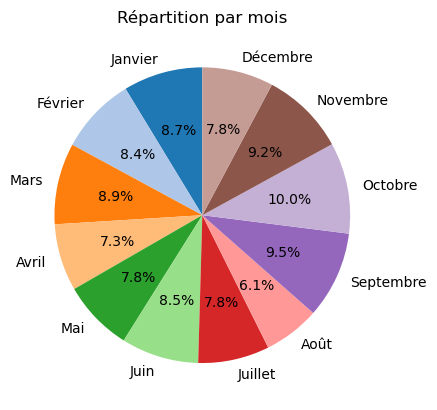

In [16]:
# Créez une liste des sommes par mois
somme_par_mois = [
    somme_janvier, somme_fevrier, somme_mars, somme_avril,
    somme_mai, somme_juin, somme_juillet, somme_aout,
    somme_septembre, somme_octobre, somme_novembre, somme_decembre
]

# Labels des mois
labels_mois = [
    'Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 
    'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre'
]

# Création du camembert
plt.pie(
    somme_par_mois, labels=labels_mois, autopct='%1.1f%%', 
    startangle=90, colors=plt.cm.tab20.colors
)
plt.title('Répartition par mois')
plt.show()


La classification par jour 1,2,3 ne semble pas pertinente on va remplacer cela par lundi mardi mercredi en hote ones encoded 



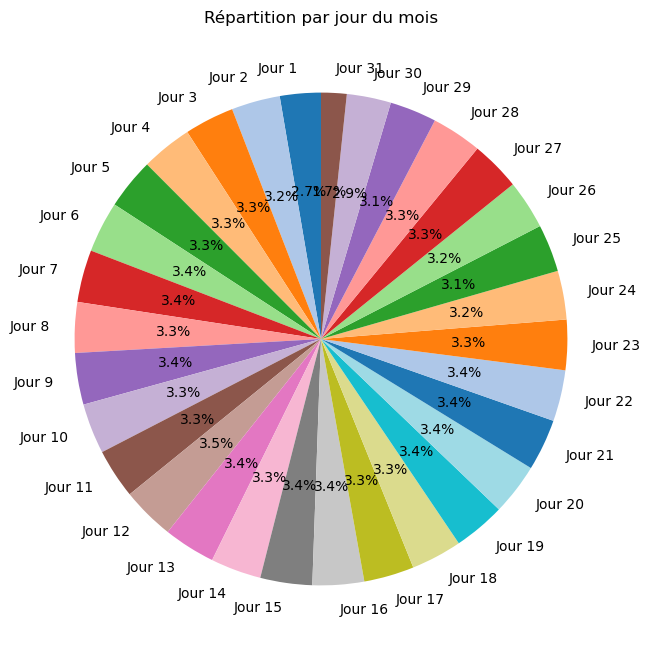

In [17]:
# Créez une liste des sommes par jour du mois
somme_par_jour = [Visu.loc[Visu['Jour'] == jour, 'y'].sum() for jour in range(1, 32)]

# Labels des jours
labels_jours = [f'Jour {jour}' for jour in range(1, 32)]

# Création du camembert
plt.figure(figsize=(10, 8))
plt.pie(
    somme_par_jour, labels=labels_jours, autopct='%1.1f%%', 
    startangle=90, colors=plt.cm.tab20.colors
)
plt.title('Répartition par jour du mois')
plt.show()


On observe bien que dans l'état cette colonne ne sert à rien

In [18]:
# Création d'une nouvelle colonne jour en hot one encoded

Train_x['jour_semaine'] = Train_x['date'].dt.day_name()

Train_x['jour_encode'] = encoder.fit_transform(Train_x['jour_semaine'])

Train_x = Train_x.drop(columns='jour_semaine')
Train_x = Train_x.drop(columns='date')

Train_x = Train_x.drop(columns='Jour')
Train_x = Train_x.drop(columns='job')

print (Train_x)

Visu = pd.concat([Train_x, Train_y], axis=1)

         ferie  vacances  Année  Mois  station_Encoded  jour_encode
0            1         1   2015     1               24            4
1            1         1   2015     1              295            4
2            1         1   2015     1              107            4
3            1         1   2015     1              367            4
4            1         1   2015     1              199            4
...        ...       ...    ...   ...              ...          ...
1229858      0         1   2022    12              368            2
1229859      0         1   2022    12              285            2
1229860      0         1   2022    12              310            2
1229861      0         1   2022    12              143            2
1229862      0         1   2022    12              391            2

[1229863 rows x 6 columns]


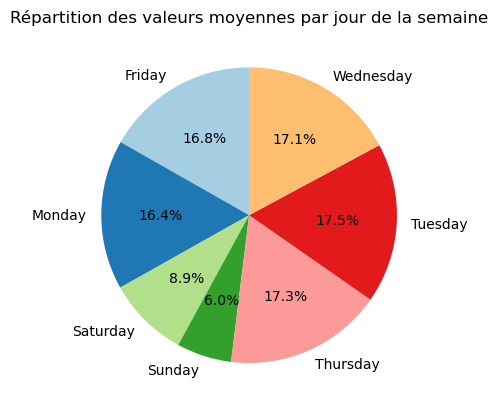

In [19]:
# Moyenne de 'y' pour chaque jour de la semaine
moyenne_par_jour = Visu.groupby('jour_encode')['y'].sum()

# Conversion des indices encodés en noms de jours
jours = encoder.inverse_transform(moyenne_par_jour.index)

# Création du graphique circulaire
plt.pie(moyenne_par_jour, labels=jours, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Répartition des valeurs moyennes par jour de la semaine')
plt.show()


On observe donc que le jour de la semaine est important et permet de meilleur résulat

In [20]:
# La metrics pour laquelle on veut optimiser est la mape donc y = 0 fait eploser la metrics ( division par 0 )
# On remplace tous les 0 par des 1 

Train_y = np.where(Train_y == 0, 1, Train_y)

print(Train_y)

[[ 7]
 [ 1]
 [ 9]
 ...
 [92]
 [91]
 [18]]


In [21]:
print(Train_x)


         ferie  vacances  Année  Mois  station_Encoded  jour_encode
0            1         1   2015     1               24            4
1            1         1   2015     1              295            4
2            1         1   2015     1              107            4
3            1         1   2015     1              367            4
4            1         1   2015     1              199            4
...        ...       ...    ...   ...              ...          ...
1229858      0         1   2022    12              368            2
1229859      0         1   2022    12              285            2
1229860      0         1   2022    12              310            2
1229861      0         1   2022    12              143            2
1229862      0         1   2022    12              391            2

[1229863 rows x 6 columns]


### On va séparer les données d'entrainements 0.8 / 0.2

In [22]:
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import RobustScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(Train_x)

X_train , X_test, y_train, y_test = train_test_split(X_scaled,Train_y,test_size=0.2,random_state=8)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print((X_train))


[[-1.75442805e-01 -7.17054853e-01  6.56231610e-01  7.16665654e-01
  -1.04898624e+00 -3.01163980e-04]
 [-1.75442805e-01 -7.17054853e-01 -6.51375206e-01 -4.41473784e-01
   1.41862884e-01 -1.49783662e+00]
 [-1.75442805e-01 -7.17054853e-01 -1.08724414e+00  1.00620051e+00
  -1.70355893e+00 -1.49783662e+00]
 ...
 [-1.75442805e-01 -7.17054853e-01  6.56231610e-01  7.16665654e-01
   2.04954228e-01 -3.01163980e-04]
 [-1.75442805e-01  1.39459345e+00  2.20362672e-01 -7.31008643e-01
   1.19864290e+00 -4.99479648e-01]
 [-1.75442805e-01  1.39459345e+00  2.20362672e-01  1.00620051e+00
  -1.63258117e+00  1.49723429e+00]]


Essayons d'entrainer un réseau de neurone

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


In [ ]:

# Définir le modèle
model_5 = Sequential([
    Dense(2048, kernel_initializer='normal',input_dim = X_train.shape[1],activation='relu'),
    BatchNormalization(),
    Dense(1024, kernel_initializer='normal',activation='relu'),
    BatchNormalization(),
    Dense(512, kernel_initializer='normal',activation='relu'),
    Dropout(0.2),
    Dense(256, kernel_initializer='normal',activation='relu'),
    BatchNormalization(),
    Dense(128,kernel_initializer='normal',activation='relu'),
    BatchNormalization(),
    Dense(64, kernel_initializer='normal',activation='relu'),
    Dropout(0.2),
    Dense(32,kernel_initializer='normal',activation='relu'),
    BatchNormalization(),
    Dense(16, kernel_initializer='normal',activation='relu'),
    BatchNormalization(),
    Dense(8, kernel_initializer='normal',activation='relu'),
    BatchNormalization(),
    Dense(1, kernel_initializer='normal',activation='linear')
    
])

model_4 = Sequential([
    Dense(1024, kernel_initializer='normal',input_dim = X_train.shape[1],activation='relu'),
    BatchNormalization(),
    Dense(512, kernel_initializer='normal',activation='relu'),
    Dropout(0.2),
    Dense(256, kernel_initializer='normal',activation='relu'),
    BatchNormalization(),
    Dense(128,kernel_initializer='normal',activation='relu'),
    BatchNormalization(),
    Dense(64, kernel_initializer='normal',activation='relu'),
    Dropout(0.2),
    Dense(32,kernel_initializer='normal',activation='relu'),
    BatchNormalization(),
    Dense(16, kernel_initializer='normal',activation='relu'),
    BatchNormalization(),
    Dense(8, kernel_initializer='normal',activation='relu'),
    BatchNormalization(),
    Dense(1, kernel_initializer='normal',activation='linear')
    
])

model_3 = Sequential([
    Dense(256, kernel_initializer='normal',input_dim = X_train.shape[1],activation='relu'),
    BatchNormalization(),
    Dense(128,kernel_initializer='normal',activation='relu'),
    BatchNormalization(),
    Dense(64, kernel_initializer='normal',activation='relu'),
    Dropout(0.2),
    Dense(32,kernel_initializer='normal',activation='relu'),
    BatchNormalization(),
    Dense(16, kernel_initializer='normal',activation='relu'),
    BatchNormalization(),
    Dense(8, kernel_initializer='normal',activation='relu'),
    BatchNormalization(),
    Dense(1, kernel_initializer='normal',activation='linear')
    
])

model_2 = Sequential([
    Dense(64, kernel_initializer='normal',input_dim = X_train.shape[1],activation='relu'),
    Dropout(0.2),
    Dense(32,kernel_initializer='normal',activation='relu'),
    BatchNormalization(),
    Dense(16, kernel_initializer='normal',activation='relu'),
    BatchNormalization(),
    Dense(8, kernel_initializer='normal',activation='relu'),
    BatchNormalization(),
    Dense(1, kernel_initializer='normal',activation='linear')
    
])

model_1 = Sequential([

    Dense(16, kernel_initializer='normal',input_dim = X_train.shape[1],activation='relu'),
    BatchNormalization(),
    Dense(8, kernel_initializer='normal',activation='relu'),
    BatchNormalization(),
    Dense(1, kernel_initializer='normal',activation='linear')
    
])

optimizer = Adam(learning_rate=0.0005)

model_5.compile(optimizer=optimizer, loss='mape', metrics=['mae'])

# Résumé du modèle
model_5.summary()


c:\aa_Perso\code\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2048)           │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,826,593 (10.78 MB)

 Trainable params: 2,819,569 (10.76 MB)

 Non-trainable params: 7,024 (27.44 KB)

In [30]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model_5.fit(X_train, y_train, batch_size=1000 , epochs=20, validation_split= 0.2, callbacks=[early_stopping])

Epoch 1/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - loss: 87.1744 - mae: 3868.5200 - val_loss: 87.6949 - val_mae: 3893.9189
Epoch 2/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - loss: 87.0117 - mae: 3848.3872 - val_loss: 87.8596 - val_mae: 3894.4312
Epoch 3/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - loss: 87.1690 - mae: 3866.0378 - val_loss: 88.6097 - val_mae: 3893.4014
Epoch 4/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - loss: 87.4465 - mae: 3864.9404 - val_loss: 87.5815 - val_mae: 3892.6113
Epoch 5/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - loss: 87.1425 - mae: 3872.5066 - val_loss: 87.4399 - val_mae: 3893.1045
Epoch 6/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - loss: 86.7705 - mae: 3848.2715 - val_loss: 87.9523 - val_mae: 3893.6951
Epoch 7/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - loss: 86.8798 - mae: 3856.7351 - val_loss: 87.6403 - val_mae: 3890.4509
Epoch 8/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - loss: 87.5010 - mae: 3868.0278 - val_loss: 87.83

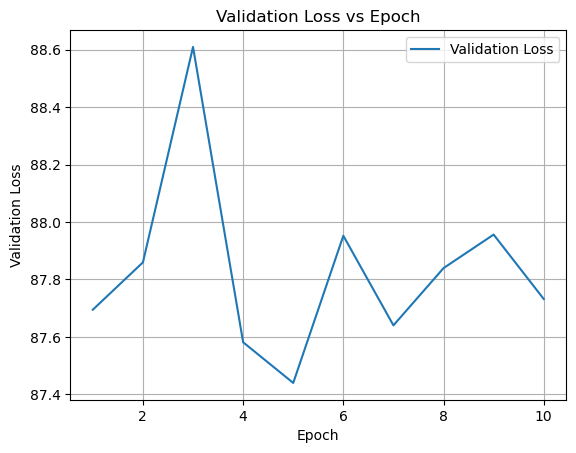

In [31]:
import matplotlib.pyplot as plt

# Récupérer les données de perte de validation
val_loss = history.history['val_loss']

# Tracer la courbe
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs Epoch')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
test_loss, test_mae = model_5.evaluate(X_test, y_test, verbose=1)

# Afficher les résultats
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

7687/7687 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 87.8061 - mae: 3871.4561
Test Loss: 88.12455749511719
Test MAE: 3863.803955078125


In [39]:
path = 'C:/aa_Centrale_Nantes/2A/Cours/APST/DATA CHALLENGE'

model_5.save(path +'/model_5.keras')  



In [25]:
Test = pd.read_csv('Base.csv')

Test['date'] = pd.to_datetime(Test['date'])

Test['Année'] = Test['date'].dt.year
Test['Mois'] = Test['date'].dt.month
Test['Jour'] = Test['date'].dt.day

Test['jour_semaine'] = Test['date'].dt.day_name()

Test['jour_encode'] = encoder.fit_transform(Test['jour_semaine'])

Test = Test.drop(columns='jour_semaine')
Test = Test.drop(columns='date')
Test = Test.drop(columns='Jour')
Test = Test.drop(columns='job')

Temp = Test['index'].copy()
Test = Test.drop(columns='index')

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Test['station_Encoded'] = encoder.fit_transform(Test['station'])

Test = Test.drop(columns='station')

print(Test)

scaler = StandardScaler()

X_scaled_test = scaler.fit_transform(Test)

       ferie  vacances  Année  Mois  jour_encode  station_Encoded
0          1         1   2023     1            3               24
1          1         1   2023     1            3              295
2          1         1   2023     1            3              107
3          1         1   2023     1            3              269
4          1         1   2023     1            3              367
...      ...       ...    ...   ...          ...              ...
78647      0         0   2023     5            6              285
78648      0         0   2023     5            6              310
78649      0         0   2023     5            6              143
78650      0         0   2023     5            6              324
78651      0         0   2023     5            6              391

[78652 rows x 6 columns]


In [1]:
import keras

model_5 = keras.models.load_model('model_5.keras')
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2048)           │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,465,733 (32.29 MB)

 Trainable params: 2,819,569 (10.76 MB)

 Non-trainable params: 7,024 (27.44 KB)

 Optimizer params: 5,639,140 (21.51 MB)

In [26]:
Prediction = model_5.predict(X_scaled_test)

2458/2458 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


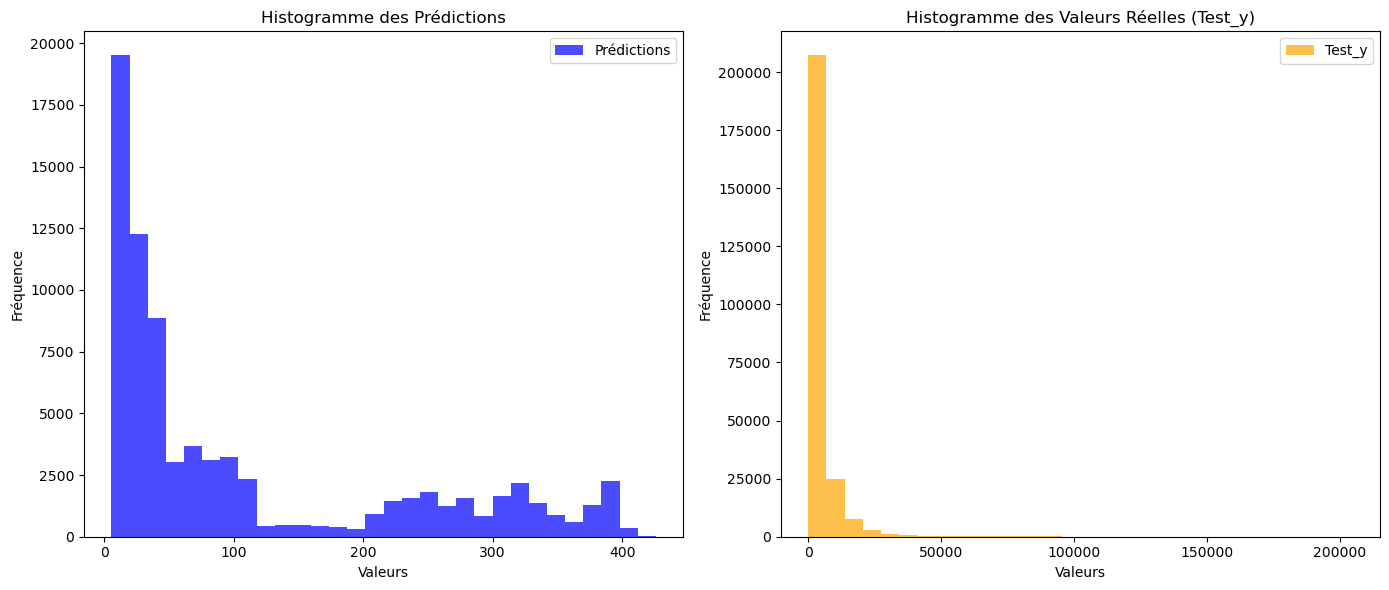

In [28]:
import matplotlib.pyplot as plt

# Créer l'histogramme pour 'predictions'
plt.figure(figsize=(14, 6))

# Histogramme des prédictions
plt.subplot(1, 2, 1)
plt.hist(Prediction, bins=30, color='blue', alpha=0.7, label='Prédictions')
plt.title("Histogramme des Prédictions")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.legend()

# Histogramme de Test_y
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=30, color='orange', alpha=0.7, label='Test_y')
plt.title("Histogramme des Valeurs Réelles (Test_y)")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.legend()

# Affichage des histogrammes
plt.tight_layout()
plt.show()


On observe que la prediction est très eloignée de la réalité, la prédiction se concentre sur des valeurs entre 20 et 80 pour la plurpart alors que la réaloité est beacoup plus cahotique avec certaines valeurs à 0 et certaines à 4000. 

In [29]:

# Calcul des moyennes et des écarts types
pred_mean = np.mean(Prediction)
pred_std = np.std(Prediction)

test_mean = np.mean(y_test)
test_std = np.std(y_test)

# Affichage des résultats
print(f"Moyenne des prédictions : {pred_mean:.2f}")
print(f"Écart type des prédictions : {pred_std:.2f}")
print(f"Moyenne des valeurs de y_Test : {test_mean:.2f}")
print(f"Écart type des valeurs de y_Test : {test_std:.2f}")


Moyenne des prédictions : 110.19
Écart type des prédictions : 121.25
Moyenne des valeurs de y_Test : 3923.24
Écart type des valeurs de y_Test : 9658.42


In [30]:
prediction_series = pd.Series(Prediction.ravel(), name='y')
result = pd.concat([Temp, prediction_series], axis=1)
result.to_csv('predictions.csv', index=False)

### Utilisation de Prophet by META

In [25]:
Train_y = pd.read_csv('y_train_sncf.csv')

from prophet import Prophet

df = Train_y.copy()

#permet de séparer la date de l'index de la gare
df[['date', 'gare']] = df['index'].str.split('_', expand=True)

# Convertir la colonne 'date' en datetime acceptée par prophet
df['date'] = pd.to_datetime(df['date'])

df = df.drop(columns=['index'])

# Séparer le DataFrame selon les gares
grouped = df.groupby('gare')

# Créer un dictionnaire 
gare_dfs = {gare: group for gare, group in grouped}

gare_prev={}

for station, df in gare_dfs.items():
    df = df.rename(columns={'date': 'ds', 'value': 'y'})
    m = Prophet()
    m.fit(df)
    future = m.make_future_dataframe(df, periods=365)
    forecast = m.predict(future)
    gare_prev[station] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

result_df = pd.concat(gare_prev, axis=0)
result_df.to_csv('predictions_p.csv', index=False)


AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [15]:
import pandas as pd

# Charger le fichier
file_path = "R.csv"
df = pd.read_csv(file_path)

# Créer une copie pour éviter de modifier l'original
df_copy = df.copy()

# Inférer le format des dates automatiquement et les reformater
df_copy['ds'] = pd.to_datetime(df_copy['ds'], errors='coerce').dt.strftime('%Y-%m-%d')

# Vérifier si des dates n'ont pas pu être converties
invalid_dates = df_copy[df_copy['ds'].isna()]
if not invalid_dates.empty:
    print("Dates invalides détectées :", invalid_dates)

# Fusionner les colonnes 'ds' et 'gare'
df_copy['combined'] = df_copy['ds'] + '_' + df_copy['gare']

# Appliquer la logique pour fusionner les colonnes yhat, yhat_lower et yhat_upper
df_copy['final'] = df_copy.apply(lambda row: row['yhat'] if row['yhat'] > 0 else row['yhat_upper'], axis=1)

# Filtrer les lignes où la colonne 'combined' commence par "2023"
df_copy = df_copy[df_copy['combined'].str.startswith('2023')]

# Supprimer les colonnes inutiles
df_copy = df_copy.drop(columns=["ds", "yhat", "yhat_upper", "yhat_lower", "gare"])

# Afficher les premières lignes du DataFrame modifié
print(df_copy.head())

df_copy.to_csv('predictions_R.csv', index=False)


            combined       final
2898  2023-01-01_003  146.503454
2899  2023-01-02_003  407.430919
2900  2023-01-03_003  441.916803
2901  2023-01-04_003  438.256886
2902  2023-01-05_003  445.794286


In [16]:
import pandas as pd

# Charger le fichier Base
base_file_path = "Base.csv"  # Remplacez par le chemin correct de votre fichier Base
Base = pd.read_csv(base_file_path)

# Charger votre DataFrame df_copy (si ce n'est pas déjà fait)
# df_copy = pd.read_csv('votre_fichier.csv')  # Par exemple si nécessaire

# Réindexer df_copy selon l'ordre de 'index' de Base, en utilisant la colonne 'combined'
# Assurez-vous que 'Base' et 'df_copy' ont une colonne 'combined' qui peut être alignée
df_copy = df_copy.set_index('combined')  # Assurez-vous que 'combined' est l'index dans df_copy
df_copy = df_copy.reindex(Base['index'].values)  # Réorganiser selon 'index' de Base

# Réinitialiser l'index et garder la colonne 'combined'
df_copy = df_copy.reset_index(drop=False)

# Afficher le résultat
print(df_copy.head())

df_copy.to_csv('predictions_R.csv', index=False)

         combined      final
0  2023-01-01_1J7  43.889188
1  2023-01-01_O2O  25.469118
2  2023-01-01_8QR  22.371897
3  2023-01-01_L58   7.091556
4  2023-01-01_UMC  43.671031
